# MBA em Ciência de Dados
### Universidade de São Paulo, São Carlos, Brasil

**Disciplina:** Aprendizado de Máquina

**Tutora:** Me. Isadora Garcia Ferrão
📧 isadoraferrao@usp.be
🌐 [linkedin](https://www.linkedin.com/in/isadora-ferrao/)

# Case: Algoritmo k-NN com o dataset iris
**Objetivo:** Criação de diferentes métricas de distância no classificador k-NN

Dataset disponível no Kaggle em: https://www.kaggle.com/datasets/vikrishnan/iris-dataset

* Importação das biblitecas e carregamento do dataset

In [20]:
import pandas as pd
from sklearn.datasets import load_iris  # Para carregar o dataset Iris
from sklearn.model_selection import train_test_split  # Para dividir os dados em treinamento e teste
from sklearn.neighbors import KNeighborsClassifier  # Para o classificador k-NN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Para avaliar o desempenho
from sklearn.preprocessing import StandardScaler  # Para normalizar os dados
import matplotlib.pyplot as plt
import seaborn as sns

print("Carregando e preparando o dataset Iris...")

# Carregar o dataset Iris
iris = load_iris()  # Função que carrega o dataset Iris do scikit-learn
X = iris.data  # Características (features) do dataset: comprimento e largura das sépalas e pétalas
y = iris.target  # Rótulos (targets): espécie da flor


# Normalizar os dados
scaler = StandardScaler()  # Cria um objeto de normalização
X_scaled = scaler.fit_transform(X)  # Ajusta o scaler aos dados e transforma X para ter média 0 e desvio padrão 1

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# Divide os dados em 70% para treinamento e 30% para teste, garantindo a mesma divisão com random_state=42

print("Preparação do dataset concluída.")

Carregando e preparando o dataset Iris...
Preparação do dataset concluída.


In [21]:
# Definir métricas de distância a serem testadas
distances = ['euclidean', 'manhattan']  # Lista de métricas de distância a serem testadas
best_distance = None  # Inicializa a melhor métrica de distância
best_accuracy = 0  # Inicializa a melhor acurácia

# Inicializar variáveis para armazenar os resultados
accuracies = []  # Lista para armazenar a acurácia de cada métrica de distância

# Loop para testar diferentes métricas de distância
for distance in distances:
    print(f"\nTestando métrica de distância: {distance}")

    # Inicializar o classificador k-NN com a métrica de distância atual
    model = KNeighborsClassifier(n_neighbors=5, metric=distance)
    # Cria um classificador k-NN com 5 vizinhos e a métrica de distância especificada
    model.fit(X_train, y_train)
    # Treina o modelo com os dados de treinamento
    
    # Fazer previsões e avaliar o desempenho
    y_pred = model.predict(X_test)  # Faz previsões com o conjunto de teste
    accuracy = accuracy_score(y_test, y_pred)  # Calcula a acurácia das previsões
    accuracies.append((distance, accuracy))  # Adiciona a acurácia à lista de resultados
    
    # Exibir a acurácia para a métrica atual
    print(f"Acurácia com distância {distance}: {accuracy:.4f}")
    
    # Atualizar melhores resultados
    if accuracy > best_accuracy:
        best_distance = distance  # Atualiza a melhor métrica de distância
        best_accuracy = accuracy  # Atualiza a melhor acurácia


Testando métrica de distância: euclidean
Acurácia com distância euclidean: 1.0000

Testando métrica de distância: manhattan
Acurácia com distância manhattan: 1.0000


* Resultados

In [22]:

# Mostrar resultados do melhor modelo
print(f"\nMelhor métrica de distância: {best_distance}")
print(f"Melhor acurácia: {best_accuracy:.4f}")

# Exibir uma tabela com as acurácias para diferentes métricas
accuracies_df = pd.DataFrame(accuracies, columns=['Métrica de Distância', 'Acurácia'])
print("\nTabela de Acurácias:")
print(accuracies_df)


Melhor métrica de distância: euclidean
Melhor acurácia: 1.0000

Tabela de Acurácias:
  Métrica de Distância  Acurácia
0            euclidean       1.0
1            manhattan       1.0


Matriz de Confusão:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



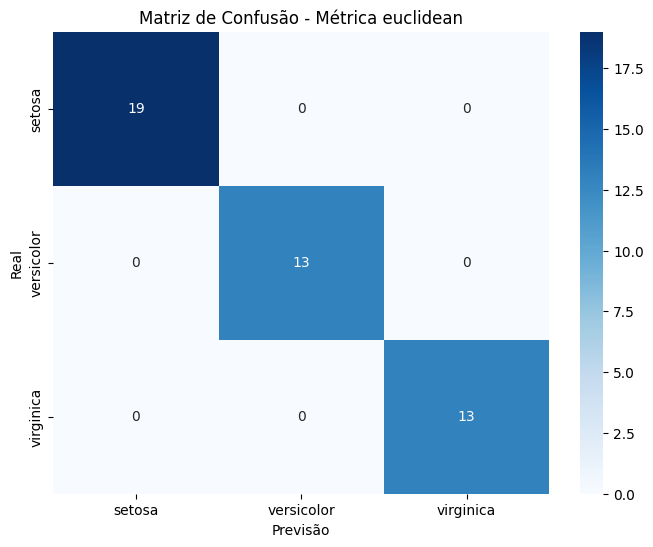

In [23]:
# Calcular e exibir a matriz de confusão para a melhor métrica de distância
model_best = KNeighborsClassifier(n_neighbors=5, metric=best_distance)
model_best.fit(X_train, y_train)
y_pred_best = model_best.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)
print("Matriz de Confusão:")
print(conf_matrix)

# Exibir o relatório de classificação para a melhor métrica
class_report = classification_report(y_test, y_pred_best, target_names=iris.target_names)
print("\nRelatório de Classificação:")
print(class_report)

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title(f'Matriz de Confusão - Métrica {best_distance}')
plt.show()